# READ MODIS

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import glob

In [61]:
#function to add TIME dimension to MODIS data:
"""
Months={'01':'Jan','02':'Feb',
       '03':'Mar','04':'Apr',
       '05':'May','06':'Jun',
       '07':'Jul','08':'Aug',
       '09':'Sep','10':'Oct',
       '11':'Nov','12':'Dec',}

PARclimatology = []
for dataset in range(len(TempNCDFfiles)):
    PARclimatology.append(xr.open_dataset(TempNCDFfiles[dataset]))
    print(Months.get(PARclimatology[dataset].time_coverage_start[5:7]))
    PARclimatology[dataset] = PARclimatology[dataset].assign_coords(time=int(PARclimatology[dataset].time_coverage_start[5:7]))
    PARclimatology[dataset] = PARclimatology[dataset].expand_dims('time')
    PARclimatology[dataset].to_netcdf(path='MODIS/PARMonthlyClimatology/modified/PAR_Climatology_'+Months.get(PARclimatology[dataset].time_coverage_start[5:7])+'.nc')
    
"""


Jul
Feb
Oct
Aug
Apr
May
Jun
Jan
Mar
Sep
Nov
Dec


In [4]:
TempNCDFfiles2 = glob.glob('MODIS/PARMonthlyClimatology/modified/*.nc', recursive=True)
MODIS2 = xr.open_mfdataset(TempNCDFfiles2,combine='by_coords')

In [5]:
MODIS2

<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 2160, lon: 4320, rgb: 3, time: 12)
Coordinates:
  * lon      (lon) float32 -179.95833 -179.875 ... 179.87502 179.95836
  * lat      (lat) float32 89.958336 89.875 89.79167 ... -89.87501 -89.958336
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    par      (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 4320), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes:
    product_name:                      A20023352018365.L3m_MC_PAR_par_9km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    16-year
    processing_version:                2018.0
    date_

In [6]:
MODIS2X = MODIS2.drop_dims(['eightbitcolor','rgb'])
MODIS_df = MODIS2X.sel(lat=40,lon=-20, method='nearest').to_dataframe()
MODIS_df#.to_csv('../PAR40minus20.csv')

,lon,lat,par
time,,,
1,-20.041662,40.041664,13.993996
2,-20.041662,40.041664,21.263996
3,-20.041662,40.041664,29.809998
4,-20.041662,40.041664,39.133999
5,-20.041662,40.041664,46.703999
6,-20.041662,40.041664,51.225998
7,-20.041662,40.041664,51.562000
8,-20.041662,40.041664,47.174000
9,-20.041662,40.041664,36.867996


In [ ]:
MODIS2X = MODIS2.drop_dims(['eightbitcolor','rgb'])

Lat = np.array(MODIS2X['lat'])
Lon = np.array(MODIS2X['lon'])
PAR = np.array(MODIS2X['par'])

Lats,Lons = np.meshgrid(Lat,Lon,indexing='ij')


fig = plt.figure(figsize=(18, 16), edgecolor='w')
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.shadedrelief(scale=0.5)
m.pcolormesh(Lons, Lats, PAR[1], latlon=True, cmap='RdBu_r')

#lat = 50
#lon = -70
#x,y = m(lon, lat)
#m.plot(x, y, 'bo', markersize=24)

m.drawcoastlines(color='lightgray')




In [12]:
Lat = np.array(MODIS2X['lat'])
Lon = np.array(MODIS2X['lon'])
PAR = np.array(MODIS2X['par'])

In [16]:
Lats,Lons = np.meshgrid(Lat,Lon,indexing='ij')

In [11]:
MODIS_df['lat'].values

array([40.041664, 40.041664, 40.041664, 40.041664, 40.041664, 40.041664,
       40.041664, 40.041664, 40.041664, 40.041664, 40.041664, 40.041664],
      dtype=float32)

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


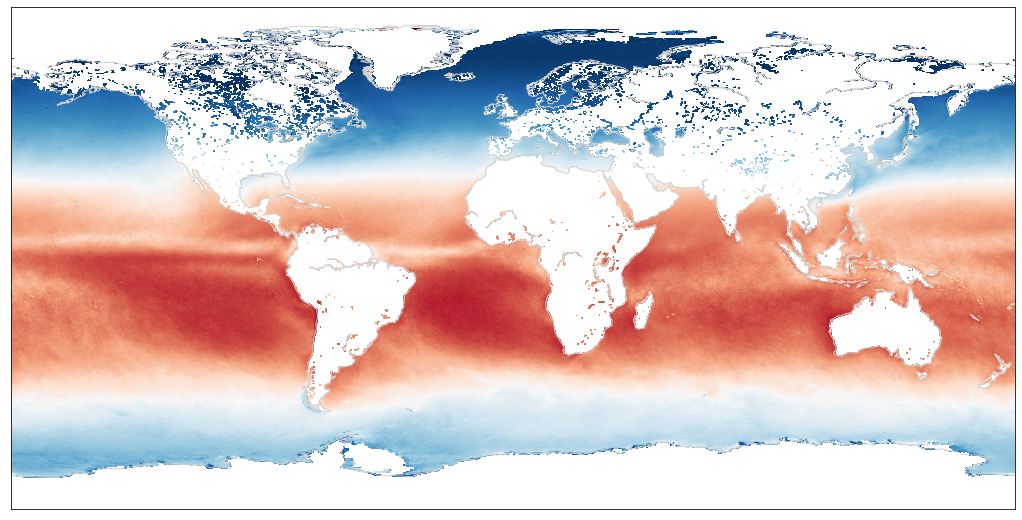

In [21]:
fig = plt.figure(figsize=(18, 16), edgecolor='w')
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
#m.shadedrelief(scale=0.5)
m.pcolormesh(Lons, Lats, PAR[1], latlon=True, cmap='RdBu_r')

#lat = 50
#lon = -70
#x,y = m(lon, lat)
#m.plot(x, y, 'bo', markersize=24)

m.drawcoastlines(color='lightgray')


